In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("C:\\Users\\Deepak Dasariya\\Desktop\\data.csv")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [5]:
df["x1"].fillna(0, inplace=True)
df["x2"].fillna(0, inplace=True)

In [6]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [7]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

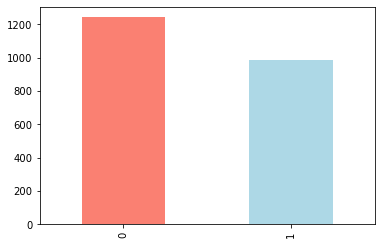

In [8]:
# Plot the value counts with a bar graph
df.y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.807947,8.935573e+04,0.442299
std,74.856045,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-7.997687e+01,0.000000
50%,-9.124370,-1.000000e+00,0.000000
75%,59.633331,6.374987e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [10]:
df.shape

(2227, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [12]:
corr_matrix = df.corr()

In [13]:
corr_matrix

,x1,x2,y
x1,1.000000,0.037277,-0.121106
x2,0.037277,1.000000,-0.026698
y,-0.121106,-0.026698,1.000000


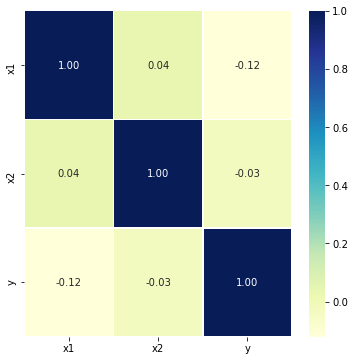

In [14]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix,
 annot=True,
 linewidths=0.5,
 fmt= ".2f",
 cmap="YlGnBu");

In [15]:
X = df.drop("y", axis=1)
Y = df['y']

In [16]:
X.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108045,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [17]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [18]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [19]:
X_train.head()

,x1,x2
583,-0.134339,12.738901
771,-50.366669,46.000000
2083,-126.267136,-123.706444
888,9.503954,-52.485991
1068,40.173980,50.024147


In [20]:
Y_test.head()

56      1
494     1
1676    0
218     1
744     1
Name: y, dtype: int64

In [21]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "SVM Linear": SVC(kernel='linear'),
          "SVM rbf": SVC(kernel='rbf'),
          "Decision Tree Classifier" : DecisionTreeClassifier()}

In [22]:
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
 # Random seed for reproducible results
    np.random.seed(42)
 # Make a list to keep model scores
    model_scores = {}
 # Loop through models
    for name, model in models.items():
 # Fit the model to the data
        model.fit(X_train, Y_train)
 # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

{'KNN': 0.9641255605381166,
 'Logistic Regression': 0.5665171898355755,
 'SVM Linear': 0.5426008968609866,
 'SVM rbf': 0.5426008968609866,
 'Decision Tree Classifier': 0.9476831091180867}

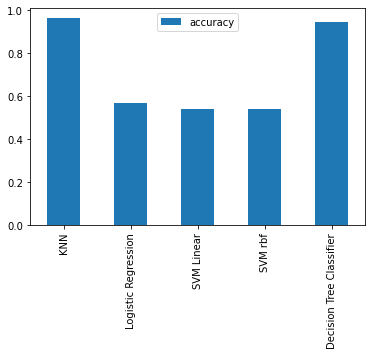

In [24]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter Tuning For KNN

In [25]:
# Create a list of train scores
train_scores = []
# Create a list of test scores
test_scores = []
# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
 
 # Fit the algorithm
    knn.fit(X_train, Y_train)
 
 # Update the training scores
    train_scores.append(knn.score(X_train, Y_train))
 
 # Update the test scores
    test_scores.append(knn.score(X_test, Y_test))

In [26]:
train_scores

[1.0,
 0.9672657252888318,
 0.9711168164313222,
 0.9576379974326059,
 0.9576379974326059,
 0.9563543003851092,
 0.9550706033376123,
 0.9492939666238768,
 0.9473684210526315,
 0.9473684210526315,
 0.9454428754813864,
 0.9454428754813864,
 0.9435173299101413,
 0.944801026957638,
 0.9486521181001284,
 0.9486521181001284,
 0.9467265725288831,
 0.9499358151476252,
 0.94801026957638,
 0.9473684210526315]

Maximum KNN score on the test data: 97.31%


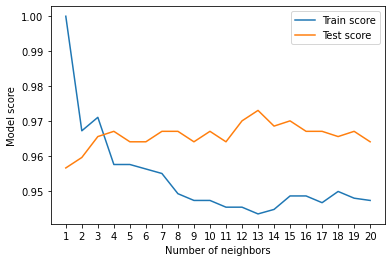

In [27]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning For Logistic Regression 

In [28]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

In [29]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\An

In [30]:
gs_log_reg.best_params_

{'C': 0.004832930238571752, 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(X_test, Y_test)

0.5455904334828101

### Hyperparameter Tuning of Decision Tree Classifier 

In [32]:
param_dict = {"criterion":["gini", "entropy"],
              "max_depth":range(1,10),
              "min_samples_split":range(1,10),
              "min_samples_leaf":range(1,5)
}

In [33]:
grid = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=param_dict,
                     cv=2,
                     verbose=1,
                     n_jobs=-1)

grid.fit(X_train, Y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661
 0.58215661 0.58215661 0.58215661        nan 0.58215661 0.58215661
 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661
        nan 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661
 0.58215661 0.58215661 0.58215661        nan 0.58215661 0.58215661
 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661 0.58215661
        nan 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965
 0.78112965 0.78112965 0.78112965        nan 0.78112965 0.78112965
 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965
        nan 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965
 0.78112965 0.78112965 0.78112965        nan 0.78112965 0.78112965
 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965 0.78112965
        nan 0.87869063 0.87869063 0.87869063 0.87869063 0.87869063

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [34]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [36]:
grid.best_score_

0.9326059050064185

### Hyperparameter Tuning of SVM with Linear Kernel

In [37]:
 # defining parameter range
param_grid = {'C': [10], 
              'gamma': [1],
              'kernel': ['linear']}

In [44]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.3s
[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.3s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.3s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [1], 'kernel': ['rbf']},
             verbose=3)

In [45]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print the accuracy
grid.best_score_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


0.6335105944430703

### Hyperparamter Tuning of SVM with rbf kernel

In [40]:
 # defining parameter range
param_grid = {'C': [10], 
              'gamma': [1],
              'kernel': ['rbf']}

In [41]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [1], 'kernel': ['rbf']},
             verbose=1)

In [42]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [43]:
grid.best_score_

0.6335105944430703

## KNN Model has the highest Accuracy
   
   KNN model is better accuracy followed by Decision tree than others because the data we have is non-linear.
   The KNN algorithm can compete with the most accurate models because it makes highly accurate        prediction. 
   Therefore, you can use the KNN algorithm for applications that require high accuracy.
 